In [2]:
#http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scicon

from matplotlib import animation, rc
from IPython.display import HTML
from math import ceil

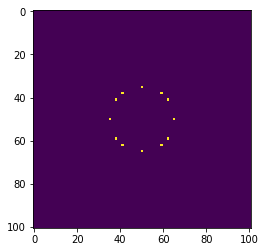

In [3]:
#Make 2D
# solve r..
L = 5 # m
size = 100 + 1
center = size//2
radius = 15

r = np.empty((1,2)) # units: m
v = np.empty((1,2)) # units: m/s
qe = scicon.e
m = scicon.m_e
# qe = 1
# m = 1

N = np.zeros((size,size)) # units:
for j in range(size):
    for i in range(size):
        if (j-center)**2 + (i-center)**2  == radius**2:
            N[j,i] += qe*L**-3


# construct initial positions r and initial velocity v
for j in range(size):
    for i in range(size):
        if N[j,i] == qe*L**-3:
            r = np.append(r, [[j,i]], axis = 0) # r = np.append(r, [[1,2,3]], axis = 0)
            v = np.append(v, [[0,0]], axis = 0)
r = np.delete(r,0,0) # remove first element, which is empty
v = np.delete(v,0,0)
r *= (L/(size-1))

plt.imshow(N)

In [1]:
#Make 2D
# solve r..
L = 2e-2 # m
size = 100 + 1
center = size//2

r = np.empty((1,2)) # units: m
v = np.empty((1,2)) # units: m/s
qe = scicon.e
m = scicon.m_e
# qe = 1
# m = 1

# radius = 15
# N = np.zeros((size,size)) # units:
# for j in range(size):
#     for i in range(size):
#         if (j-center)**2 + (i-center)**2  == radius**2:
#             N[j,i] += qe*L**-3


# # construct initial positions r and initial velocity v
# for j in range(size):
#     for i in range(size):
#         if N[j,i] == qe*L**-3:
#             r = np.append(r, [[j,i]], axis = 0) # r = np.append(r, [[1,2,3]], axis = 0)
#             v = np.append(v, [[0,0]], axis = 0)
# r = np.delete(r,0,0) # remove first element, which is empty
# v = np.delete(v,0,0)
# r *= (L/(size-1))

# construct initial positions r and initial velocity v
pts = 10
rad = L/3 # rad < L/2
for angle in np.arange(0,2*np.pi, 2*np.pi/(pts+1)):
    r = np.append(r, [[0.5*L + rad*np.sin(angle), 0.5*L + rad*np.cos(angle)]], axis = 0) # r = np.append(r, [[1,2,3]], axis = 0)
    v = np.append(v, [[0,0]], axis = 0)
r = np.delete(r,0,0) # remove first element, which is empty
v = np.delete(v,0,0)


def f1(T, t):
    dr_dt = T[1]
    return dr_dt


def f2(T, t):
    r, v = T[0], T[1]
    dv_dt = []
    
    temp = 0
    q_test, q_source = qe, qe
    k = 1/(4*np.pi*scicon.epsilon_0)
    for index_t in range(len(r)):
        for index_s in range(len(r)):
            if index_t != index_s:
                test = r[index_t]
                source = r[index_s]
                d = test-source
                dmag = np.sqrt(d[0]**2 + d[1]**2)
                temp = temp + (q_source*(dmag**-3))*(d)
        temp = temp*(k*q_test/m)
        dv_dt.append(temp)
        temp = 0
    dv_dt = np.array(dv_dt)
    return dv_dt
                
            

def f(T, t):
    dr_dt = f1(T,t)
    dv_dt = f2(T,t)
    return np.array([dr_dt,dv_dt])

images = []
fig = plt.figure()

# h = 25e-12
# h = 2e-3 #s
h = L/25000 #s
T = [r,v]
mult = 300
for t in np.arange(0,mult*h,h):
#     image = plt.imshow(N, animated = True)
    xpoints, ypoints = [], []
    for index in range(len(T[0])):
        xpoints.append(T[0][index][1])
        ypoints.append(T[0][index][0])
    image = plt.scatter(xpoints, ypoints, color = 'blue', animated = True)
    plt.xlabel('x-axis (m)')
    plt.ylabel('y-axis (m)')
    plt.xlim(0,L)
    plt.ylim(0,L)
    images.append([image])
    
    # calculate r from eq'n of motion
    k1 = h*f(T,t)
    k2 = h*f(T + 0.5*k1, t + 0.5*h)
    k3 = h*f(T + 0.5*k2, t + 0.5*h)
    k4 = h*f(T + k3, t + h)
    T += (k1 + 2*k2 + 2*k3 + k4)/6
    
    # implement boundary conditions
    for index1 in range(len(T[0])):
        r0 = T[0][index1]
        v0 = T[1][index1]
        for index2 in range(len(r0)):
            if r0[index2] > L:
                r0[index2] = L - (r0[index2]%L)
                v0[index2] *= -1
            elif r0[index2] < 0:
                r0[index2] = r0[index2]%(-L)
                r0[index2] = abs(r0[index2])
                v0[index2] *= -1

    
    # update N mesh
    N = 0*N
    for index in range(len(T[0])):
        r0 = T[0][index]
        j,i = int(round(r0[0]*(size-1)/L)), int(round(r0[1]*(size-1)/L))
        N[j,i] += qe*L**-3
    
#     print('pass complete')
print('now animating')
    
anim = animation.ArtistAnimation(fig, images, interval = 100, blit=False)
anim.save('particols.gif', writer = 'mencoder')

# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter
HTML(anim.to_jshtml())

NameError: name 'np' is not defined

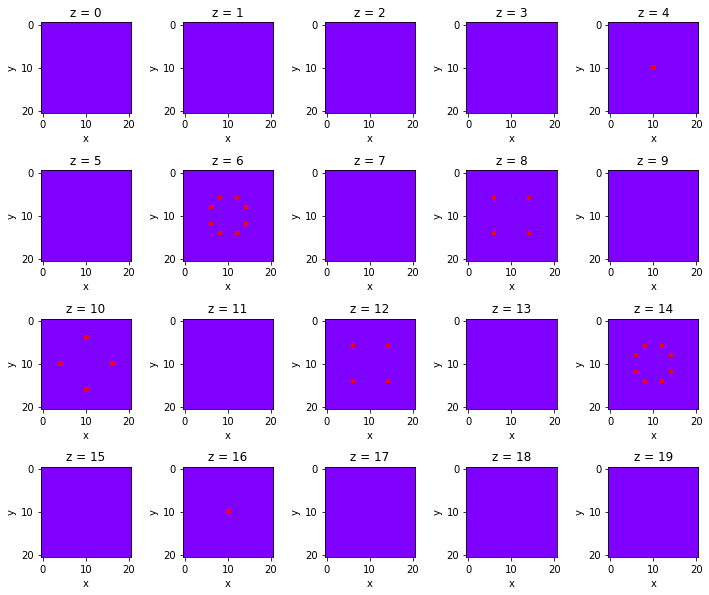

In [4]:
# solve r..
L = 5 # m
size = 20 + 1
center = size//2
radius = 6

r = np.empty((1,3)) # units: m
v = np.empty((1,3)) # units: m/s
qe = scicon.e
m = scicon.m_e
# qe = 1
# m = 1

N = np.zeros((size,size,size)) # units: 
for k in range(size):
    for j in range(size):
        for i in range(size):
            if (k-center)**2 + (j-center)**2 + (i-center)**2  == radius**2:
                N[k,j,i] += qe*L**-3


# construct initial positions r and initial velocity v
for k in range(size):
    for j in range(size):
        for i in range(size):
            if N[k,j,i] == qe*L**-3:
                r = np.append(r, [[k,j,i]], axis = 0) # r = np.append(r, [[1,2,3]], axis = 0)
                v = np.append(v, [[0,0,0]], axis = 0)
r = np.delete(r,0,0) # remove first element, which is empty
v = np.delete(v,0,0)
r *= (L/(size-1))


w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = int(ceil(size/columns))
for i in range(1, size):
    img = N[i-1,:,:]
#     ti = i*L*((size-1)**-1)
#     fig.add_subplot(rows, columns, i).title.set_text('z = %f m'%ti) # f for float. i for int
    fig.add_subplot(rows, columns, i).title.set_text('z = %i'%(i-1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.imshow(img, cmap = 'rainbow')
fig.tight_layout()
plt.show()

In [5]:
def f1(T, t):
    dr_dt = T[1]
#     print(dr_dt)
    return dr_dt


def f2(T, t):
    r, v = T[0], T[1]
    dv_dt = []
    # implement boundary conditions
    for element in r:
        for index in range(len(element)):
            if 0 < element[index] < L:
                continue
            elif element[index] > L:
                element[index] = L - (element[index]%L)
            elif element[index] < 0:
                element[index] = element[index]%(-L)
                element[index] = abs(element[index])
    
    temp = 0
    q_test, q_source = qe, qe
    k = 1/(4*np.pi*scicon.epsilon_0)
    for index_t in range(len(r)):
        for index_s in range(len(r)):
            if index_t != index_s:
                test = r[index_t]
                source = r[index_s]
                d = test-source
                dmag = np.sqrt(d[0]**2 + d[1]**2 + d[2]**2)
                temp = temp + (q_source*(dmag**-3))*(d)
        temp = temp*(k*q_test/m)
        dv_dt.append(temp)
        temp = 0
    dv_dt = np.array(dv_dt)
    return dv_dt
                
            

def f(T, t):
    dr_dt = f1(T,t)
    dv_dt = f2(T,t)
    return np.array([dr_dt,dv_dt])


# h = 25e-12
h = 2e-3 #s
T = [r,v]
mult = 10
for t in np.arange(0,mult*h,h):
    
    # calculate r from eq'n of motion
    k1 = h*f(T,t)
    k2 = h*f(T + 0.5*k1, t + 0.5*h)
    k3 = h*f(T + 0.5*k2, t + 0.5*h)
    k4 = h*f(T + k3, t + h)
    T += (k1 + 2*k2 + 2*k3 + k4)/6
    
    # implement boundary conditions
    for element in T[0]:
        for index in range(len(element)):
            if element[index] > L:
                element[index] = L - (element[index]%L)
            elif element[index] < 0:
                element[index] = element[index]%(-L)
                element[index] = abs(element[index])

    
    # update N mesh
    N = 0*N
    for index in range(len(T[0])):
        r0 = T[0][index]
        k,j,i = int(round(r0[0]*(size-1)/L)), int(round(r0[1]*(size-1)/L)), int(round(r0[2]*(size-1)/L))
        N[k,j,i] += qe*L**-3
    
    print('pass complete') 

pass complete
pass complete
pass complete
pass complete
pass complete
pass complete
pass complete
pass complete
pass complete
pass complete


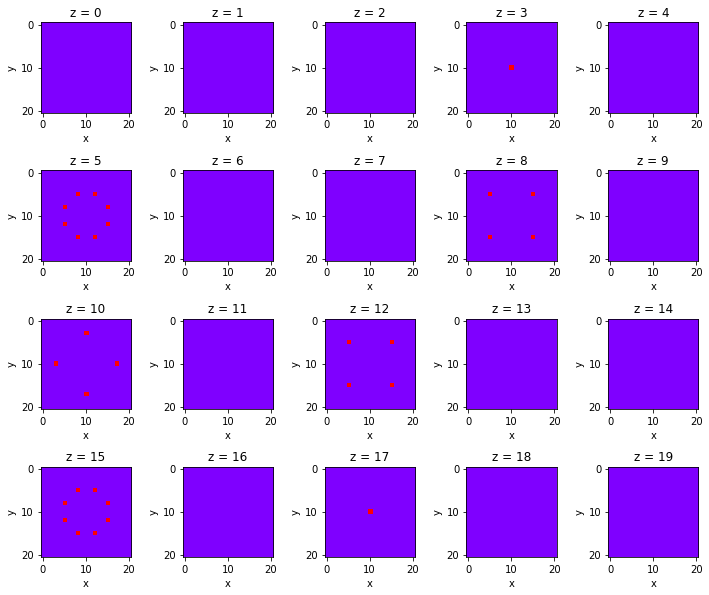

In [6]:
# https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly
w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = int(ceil(size/columns))
for i in range(1, size):
    img = N[i-1,:,:]
#     ti = i*L*((size-1)**-1)
#     fig.add_subplot(rows, columns, i).title.set_text('z = %f m'%ti) # f for float. i for int
    fig.add_subplot(rows, columns, i).title.set_text('z = %i'%(i-1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.imshow(img, cmap = 'rainbow')
fig.tight_layout()
plt.show()